# Spotify Data Visualizations 

## 01 Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
%matplotlib inline 

In [2]:
path = '/Users/brookecoffey/Desktop/DataAnalyticsTy/Achievement 6 /Spotify Project'

In [3]:
df = pd.read_pickle(os.path.join(path,'01 Data','02 Prepared Data','full_df_cleaned.pkl'))

In [4]:
df.shape

(173311, 19)

In [5]:
df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'latitude', 'longitude',
       'region'],
      dtype='object')

In [6]:
# Checking for duplicates
df_dups = df[df.duplicated()]

In [7]:
df_dups.shape

(26, 19)

In [8]:
df_dups.head()

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,latitude,longitude,region
8505,2017-08-21 00:14:50,"iOS 10.3.2 (iPhone8,1)",0,US,Meat Grinder,Madvillain,Madvillainy,spotify:track:0dIDLi5yCGx3YxnJSz7flh,NaN,NaN,NaN,clickrow,endplay,False,NaT,False,40.4730,-79.9537,Pennsylvania
8508,2017-08-21 00:14:50,"iOS 10.3.2 (iPhone8,1)",0,US,Meat Grinder,Madvillain,Madvillainy,spotify:track:0dIDLi5yCGx3YxnJSz7flh,NaN,NaN,NaN,clickrow,endplay,False,NaT,False,40.4730,-79.9537,Pennsylvania
27200,2018-05-16 19:04:43,"iOS 11.3.1 (iPhone8,1)",0,US,Atlantis (Remix) - Demo Taped Remix,Bridgit Mendler,Atlantis (Demo Taped Remix),spotify:track:3YKb4RfxFidWLwfbM9kief,None,None,None,clickrow,endplay,False,NaT,False,33.5226,-86.8033,Alabama
27203,2018-05-16 19:04:45,"iOS 11.3.1 (iPhone8,1)",0,US,Atlantis (Remix) - Demo Taped Remix,Bridgit Mendler,Atlantis (Demo Taped Remix),spotify:track:3YKb4RfxFidWLwfbM9kief,None,None,None,clickrow,endplay,False,NaT,False,33.5226,-86.8033,Alabama
27208,2018-05-16 19:04:56,"iOS 11.3.1 (iPhone8,1)",0,US,Atlantis (Remix) - Demo Taped Remix,Bridgit Mendler,Atlantis (Demo Taped Remix),spotify:track:3YKb4RfxFidWLwfbM9kief,None,None,None,clickrow,endplay,False,NaT,False,33.5226,-86.8033,Alabama


In [9]:
# Removing Duplicates
df_no_dups = df.drop_duplicates()

In [10]:
df_no_dups.shape

(173285, 19)

## Correlation Matrix Heatmap.

In [11]:
# Defining which columns could be correlated - the data set is very categorical, so correlation won't be a main focus
df_sub = df_no_dups[['ms_played','latitude', 'longitude']].corr()

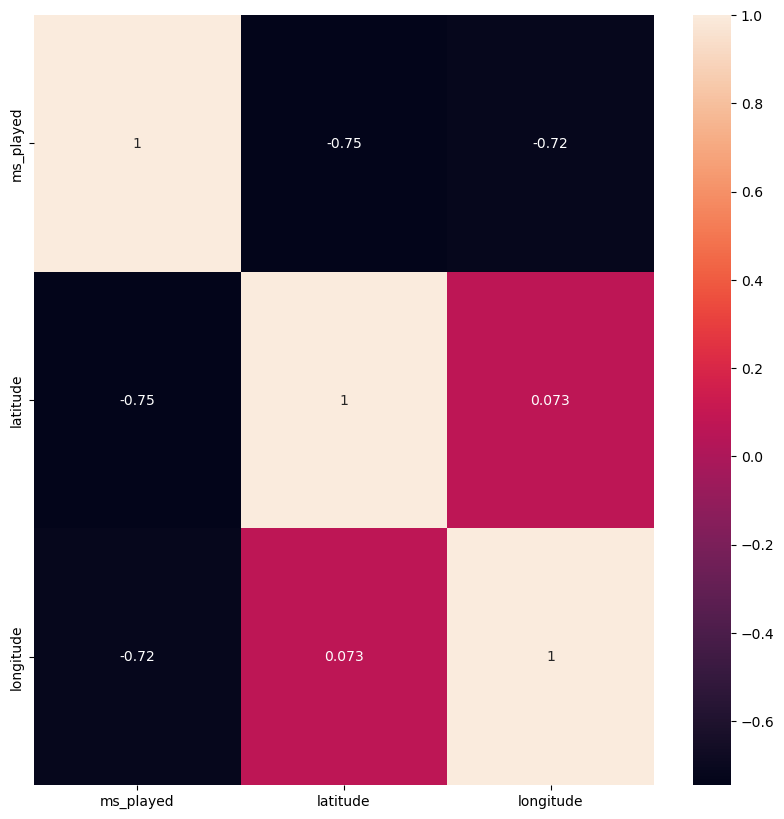

In [12]:
# Create a subplot
f,ax = plt.subplots(figsize=(10,10))

# create a correlation heatmap with seaborn 
corr = sns.heatmap(df_sub.corr(), annot=True, ax=ax)

# Observations: As mentioned above, a heatmap isn't the most suitable method of visualization for the dataset that I have as this is very categorical data.  The coefficients represent how correlated the variables are to each other, but in this case they do not represent anything actionable as it pertains to geographical information. 

## Scatterplot

Text(0.5, 1.0, 'ms_played by latitude')

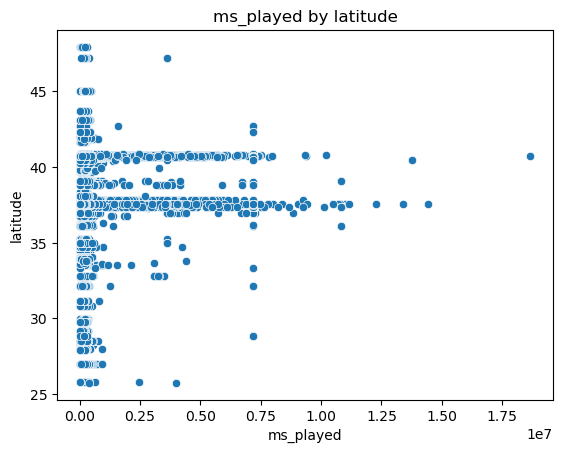

In [13]:
# Create a scatterplot
ms_played_lat = sns.scatterplot(x = 'ms_played', y='latitude', data=df_no_dups)
plt.title('ms_played by latitude')

Text(0.5, 1.0, 'ms_played by longitude')

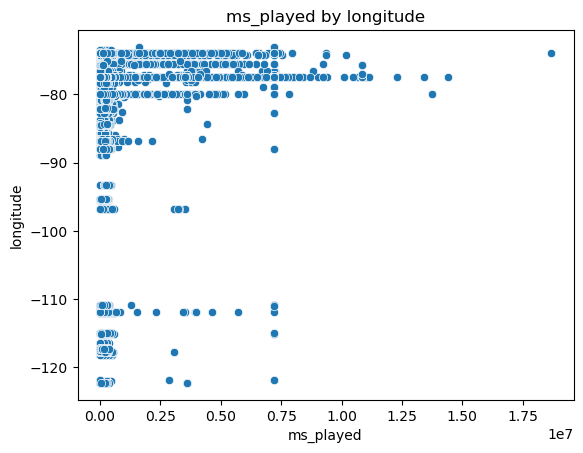

In [14]:
# Create a scatterplot of ms_played and longitude
ms_played_lon = sns.scatterplot(x = 'ms_played', y='longitude', data=df_no_dups)
plt.title('ms_played by longitude')

Text(0.5, 1.0, 'latitude and longitude')

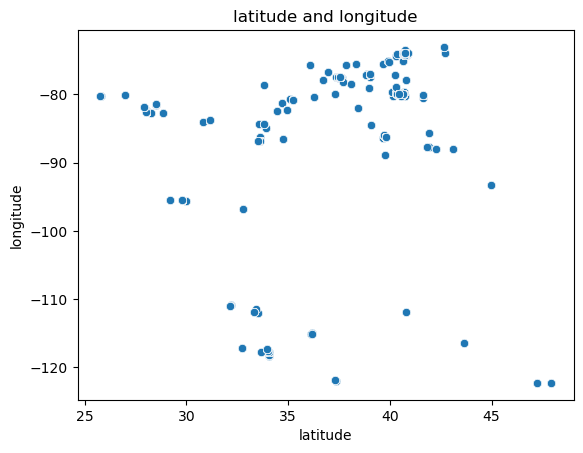

In [15]:
# Create a scatterplot of latitude and longitude 
lat_lon = sns.scatterplot(x = 'latitude', y='longitude', data=df_no_dups)
plt.title('latitude and longitude')

## Like the heatmap, these scatterplots present very little information about my listening, but they do provide information about the geographical variety of my data.  As well as a general frequency of which locations were most frequent in a general sense.  This would lead me to believe that it is worthwhile to compare my data across locations in future analyses. 

# PairPlot of Entire Dataset 

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


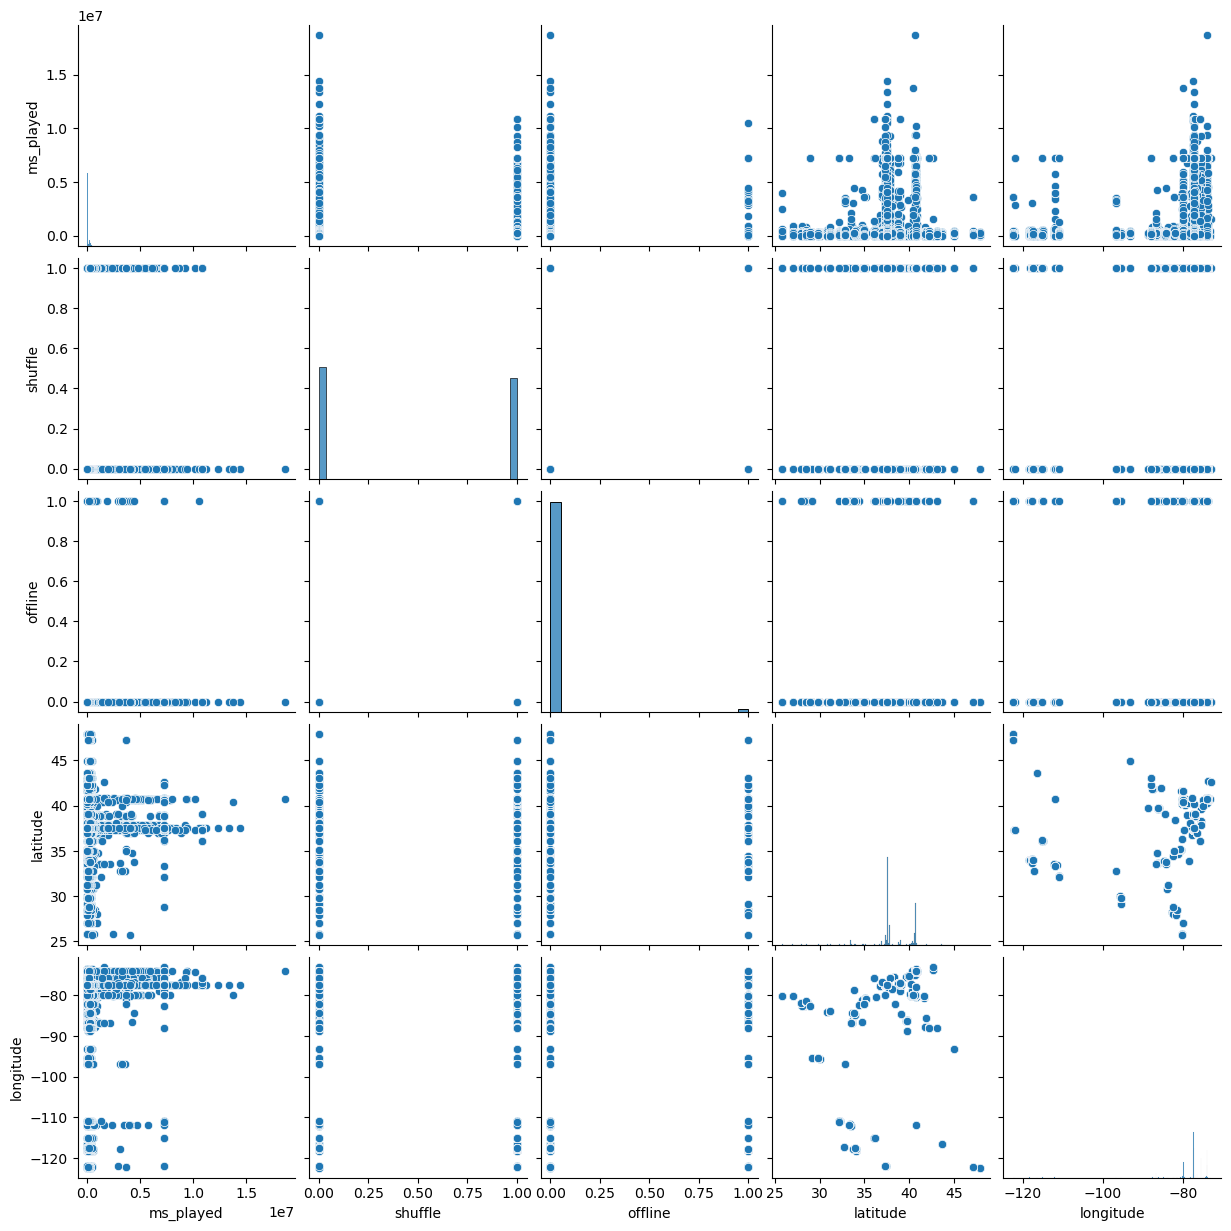

In [16]:
pairplot = sns.pairplot(df_no_dups)

## Because my data is very categorical, the pair plot doesn't uncover many insights about the data itself, but it does inform how I should approach creating visualizations for certain variables.  Most of the variables will need to be shown in histograms or aggregated in some other way

### Creating a new column that displays ms_played in minutes and seconds

In [17]:
df_no_dups['minutes_seconds'] = df_no_dups['ms_played'].apply(lambda x: pd.to_datetime(x, unit='ms').strftime('%M:%S'))

/var/folders/hg/rtfjsgrs3cz8yw53zn0slldm0000gn/T/ipykernel_6061/3026853377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups['minutes_seconds'] = df_no_dups['ms_played'].apply(lambda x: pd.to_datetime(x, unit='ms').strftime('%M:%S'))


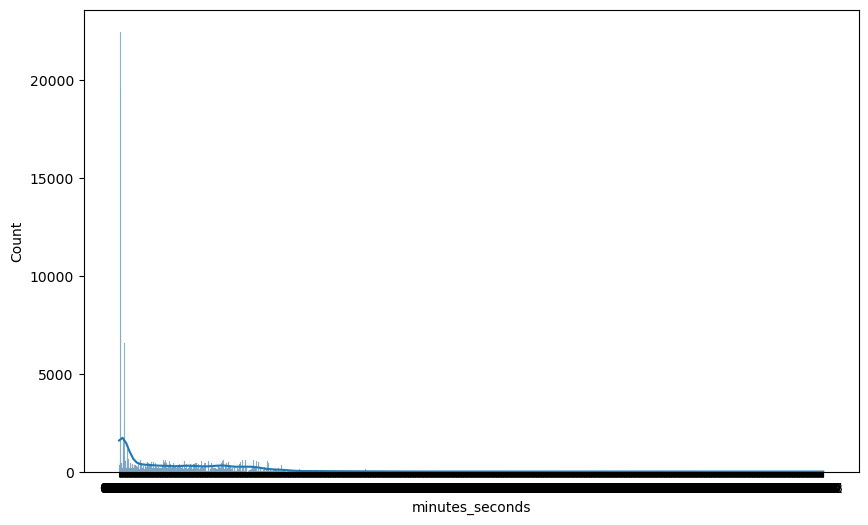

In [18]:
plt.figure(figsize=(10, 6))
track_length_hist = sns.histplot(df_no_dups['minutes_seconds'], bins = 'auto', kde=True)

In [21]:
# seeing what the large value is on the chart above and removing it 
df_no_dups['minutes_seconds'].value_counts()

00:01    22494
00:00    19598
00:02     6585
00:03     3605
00:04     2704
         ...  
56:33        1
40:36        1
40:33        1
39:45        1
49:52        1
Name: minutes_seconds, Length: 1690, dtype: int64

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

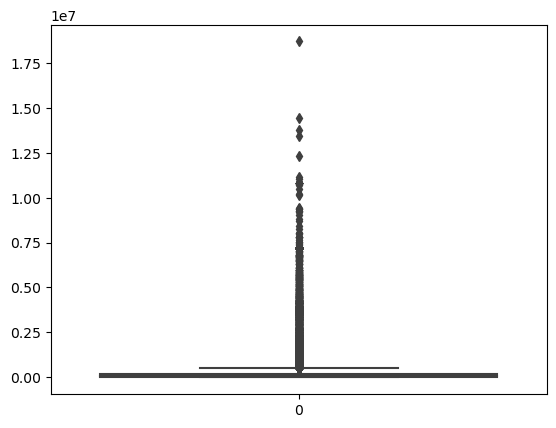

In [22]:
sns.boxplot(data=df_no_dups['ms_played'])
plt.title

## The two charts above show that there is a large skew in the data toward lower time lenghts.  I will filter out these songs as the short duration means they were skipped in the first few seconds. 

In [23]:
# Creating a new dataframe of the minutes_seconds_column filtering out values that are less than 10 seconds
df_non_zero = df_no_dups[df_no_dups['minutes_seconds'] > '00:10']

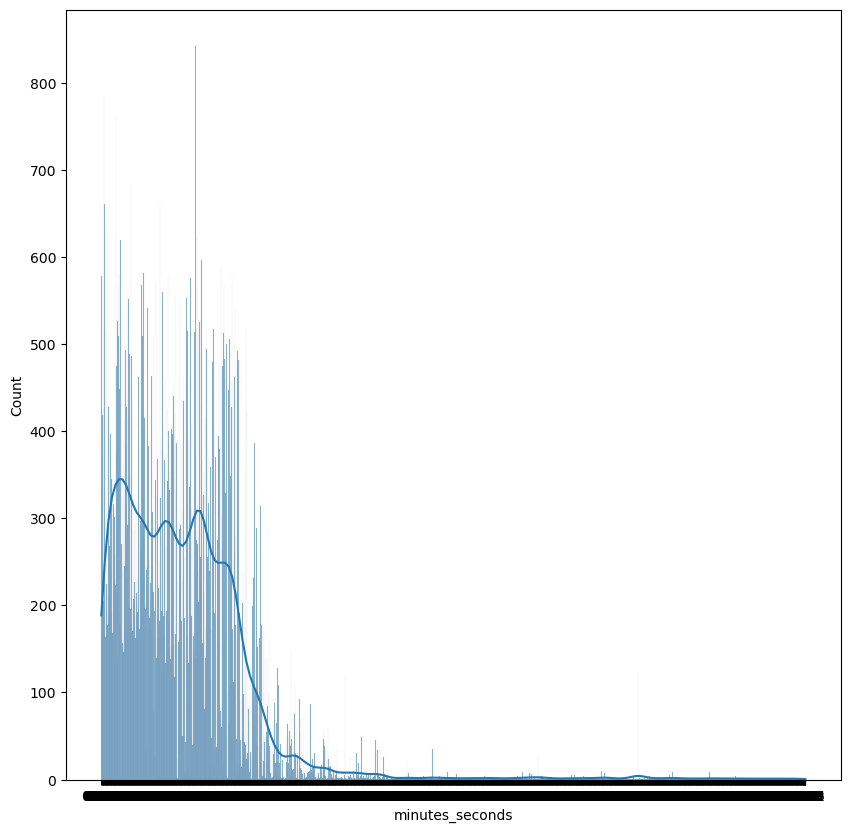

In [24]:
f,ax = plt.subplots(figsize=(10,10))
track_length_nonzero_hist = sns.histplot(df_non_zero['minutes_seconds'], bins ='auto', kde=True)

# Frequency tables for other variables

Text(0.5, 1.0, 'Frequency of Reason Start Responses')

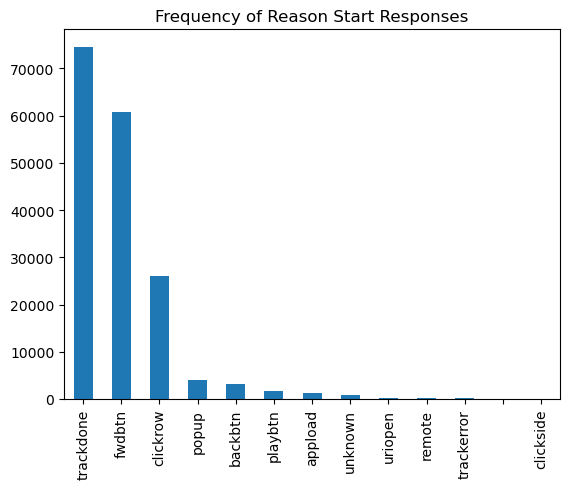

In [25]:
reason_start_dist = df_no_dups['reason_start'].value_counts().plot.bar()
plt.title('Frequency of Reason Start Responses')

Text(0.5, 1.0, 'Frequency of Reason End Responses')

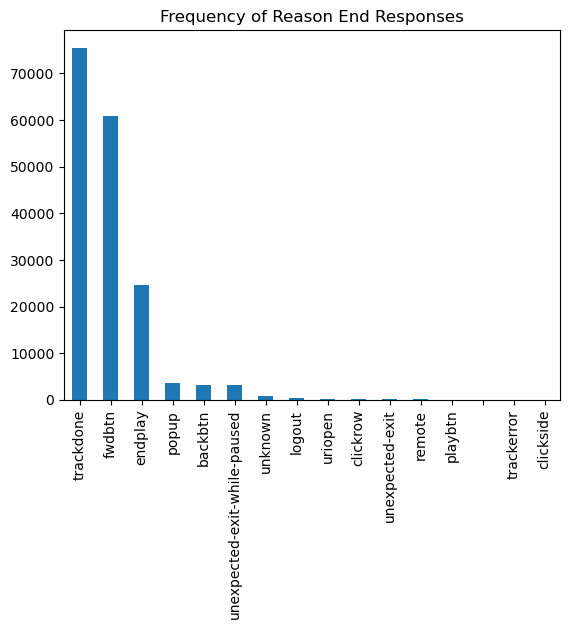

In [26]:
reason_end_dist = df_no_dups['reason_end'].value_counts().plot.bar()
plt.title('Frequency of Reason End Responses')

Text(0.5, 1.0, 'Frequency of Shuffle')

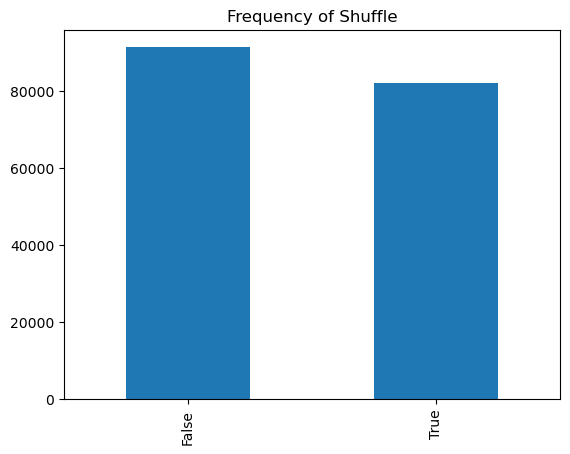

In [27]:
shuffle_dist = df_no_dups['shuffle'].value_counts().plot.bar()
plt.title('Frequency of Shuffle')

## Shuffle category is split very evenly.  It might be interesting to see if there are key differences down the road 

Text(0.5, 1.0, 'Frequency of Skipped')

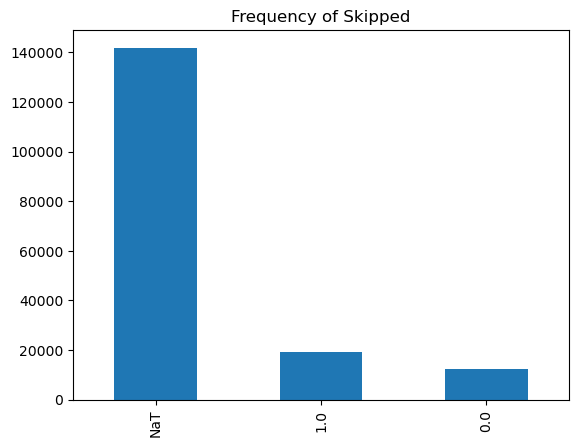

In [28]:
skipped_dist = df_no_dups['skipped'].value_counts().plot.bar()
plt.title('Frequency of Skipped')

# Skipped category can be created based off of a track done flag for either trackdone or fwdbutton (i.e. trackdone = not skipped, fwdbutton = skipped 

In [29]:
df_no_dups['reason_end'].value_counts()['trackdone']

75484

In [30]:
df_no_dups['reason_end'].value_counts()['fwdbtn']

60894

In [31]:
# Confirming how many data points these two categories cover
75514+60896

136410

In [32]:
# Getting percentage of total dataframe that would be covered by those two categories
136410/173754

0.7850754515003971

## Using this proxy measure of skipped status, we can cover approximately 78.5% of data points

In [33]:
# Swapping out the 'Skipped column'
df_no_dups.drop(columns='skipped')

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,offline,latitude,longitude,region,minutes_seconds
0,2012-07-17 02:48:23,"iOS 5.1.1 (iPod4,1)",231177,US,It's Time,Imagine Dragons,Continued Silence EP,spotify:track:40xtweuHBkLXNMO3xCK5AZ,NaN,NaN,NaN,,,False,False,40.1678,-80.2591,Pennsylvania,03:51
1,2012-07-17 22:26:20,"iOS 5.1.1 (iPod4,1)",25727,US,Jump (feat. Nelly Furtado),Flo Rida,R.O.O.T.S. (Route of Overcoming the Struggle),spotify:track:4uGucgzv0ydi35DgAlsTQ4,NaN,NaN,NaN,unknown,fwdbtn,False,False,40.1678,-80.2591,Pennsylvania,00:25
2,2012-07-17 22:26:23,"iOS 5.1.1 (iPod4,1)",3436,US,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,spotify:track:5RzFJd6W40SDTyZkX6xx45,NaN,NaN,NaN,fwdbtn,fwdbtn,False,False,40.1678,-80.2591,Pennsylvania,00:03
3,2012-07-17 22:26:24,"iOS 5.1.1 (iPod4,1)",1532,US,Over And Over,Nelly,6 Pack,spotify:track:2Gfr96HuhYqGcteLv9XUJP,NaN,NaN,NaN,fwdbtn,fwdbtn,False,False,40.1678,-80.2591,Pennsylvania,00:01
4,2012-07-17 22:26:26,"iOS 5.1.1 (iPod4,1)",1486,US,Pause,Pitbull,Planet Pit (Deluxe Version),spotify:track:0c7wqpBLOTFr1yb70LHGFM,NaN,NaN,NaN,fwdbtn,fwdbtn,False,False,40.1678,-80.2591,Pennsylvania,00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173455,2023-08-23 12:19:26,ios,917,US,Like a Virgin,Madonna,Like a Virgin,spotify:track:1ZPlNanZsJSPK5h9YZZFbZ,None,None,None,fwdbtn,fwdbtn,False,False,37.5503,-77.3942,Virginia,00:00
173456,2023-08-23 12:19:27,ios,960,US,Never Gonna Give You Up,Rick Astley,Whenever You Need Somebody,spotify:track:4cOdK2wGLETKBW3PvgPWqT,None,None,None,fwdbtn,fwdbtn,False,False,37.5503,-77.3942,Virginia,00:00
173457,2023-08-23 12:19:29,ios,1280,US,Wake Me Up Before You Go-Go,Wham!,Make It Big,spotify:track:0ikz6tENMONtK6qGkOrU3c,None,None,None,fwdbtn,fwdbtn,False,False,37.5503,-77.3942,Virginia,00:01
173458,2023-08-23 12:19:30,ios,1450,US,Our House,Madness,Madness,spotify:track:1qV6e4ITnfGmA6m6Vklvbi,None,None,None,fwdbtn,fwdbtn,False,False,37.5503,-77.3942,Virginia,00:01


In [34]:
# Defining parameters for new skipped column  
def skipped_status(reason_end):
    if reason_end == 'trackdone':
        return 'not skipped'
    elif reason_end == 'fwdbtn':
        return 'skipped'
    else:
        return 'other'

In [35]:
# Creating new skipped column 
df_no_dups['skipped']= df_no_dups['reason_end'].apply(skipped_status)

/var/folders/hg/rtfjsgrs3cz8yw53zn0slldm0000gn/T/ipykernel_6061/2548881372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups['skipped']= df_no_dups['reason_end'].apply(skipped_status)


In [36]:
df_no_dups['skipped'].value_counts()

not skipped    75484
skipped        60894
other          36907
Name: skipped, dtype: int64

In [37]:
df_no_dups['skipped'].isnull().sum()

0

Text(0.5, 1.0, 'skipped status')

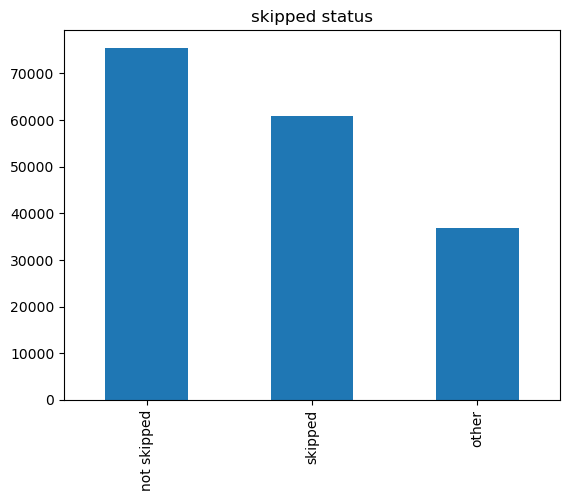

In [38]:
skipped_status = df_no_dups['skipped'].value_counts().plot.bar()
plt.title('skipped status')

## This new frequency table shows a much more accurate distribution of the skipped category than the original data 

# Separating out date columns into year, month, day of the week and hour of the day could make for good comparison variables down the road 

In [39]:
import datetime as dt

In [40]:
# Creating year column 
df_no_dups['year']= df_no_dups['ts'].dt.year

/var/folders/hg/rtfjsgrs3cz8yw53zn0slldm0000gn/T/ipykernel_6061/357180892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups['year']= df_no_dups['ts'].dt.year


In [41]:
# Creating month column
df_no_dups['month'] = df_no_dups['ts'].dt.month

/var/folders/hg/rtfjsgrs3cz8yw53zn0slldm0000gn/T/ipykernel_6061/3501201015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups['month'] = df_no_dups['ts'].dt.month


In [42]:
# Creating day of week column
df_no_dups['day_of_week']= df_no_dups['ts'].dt.weekday

/var/folders/hg/rtfjsgrs3cz8yw53zn0slldm0000gn/T/ipykernel_6061/126271135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups['day_of_week']= df_no_dups['ts'].dt.weekday


In [43]:
# Creating hour of day column
df_no_dups['hour_of_day'] = df_no_dups['ts'].dt.hour

/var/folders/hg/rtfjsgrs3cz8yw53zn0slldm0000gn/T/ipykernel_6061/2002709008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups['hour_of_day'] = df_no_dups['ts'].dt.hour


In [44]:
df_no_dups.columns

Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'latitude', 'longitude',
       'region', 'minutes_seconds', 'year', 'month', 'day_of_week',
       'hour_of_day'],
      dtype='object')

In [45]:
df_no_dups['year'].value_counts()

2020    31735
2019    30698
2022    27439
2021    27079
2018    21406
2023    17810
2017     8633
2012     3726
2013     3491
2014     1168
2015      100
Name: year, dtype: int64

In [46]:
df_no_dups['month'].value_counts()

6     17028
8     16753
7     16132
2     15458
10    14861
9     13791
11    13763
1     13392
3     13124
4     13061
12    12979
5     12943
Name: month, dtype: int64

In [47]:
df_no_dups['day_of_week'].value_counts()

1    30472
3    28816
0    27673
2    24885
4    22372
5    20139
6    18928
Name: day_of_week, dtype: int64

In [48]:
df_no_dups['hour_of_day'].value_counts()

15    13586
19    13087
16    12898
17    12577
14    12498
18    12427
21    11690
20    11216
13    10987
12     8702
22     8666
0      8306
1      7135
23     6472
2      5562
3      4359
11     3872
4      2656
5      2138
10     1404
6      1043
7       951
9       536
8       517
Name: hour_of_day, dtype: int64

In [49]:
df_no_dups[['year', 'month','day_of_week','hour_of_day']].isnull().sum()

year           0
month          0
day_of_week    0
hour_of_day    0
dtype: int64

Text(0.5, 1.0, 'Year frequency')

<Figure size 1000x600 with 0 Axes>

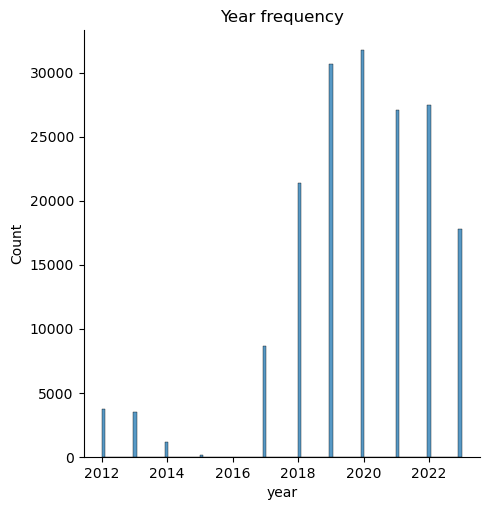

In [50]:
plt.figure(figsize=(10, 6))
year_frequency = sns.displot(df_no_dups['year'], bins = 'auto')
plt.title('Year frequency')

Text(0.5, 1.0, 'Month frequency')

<Figure size 1000x600 with 0 Axes>

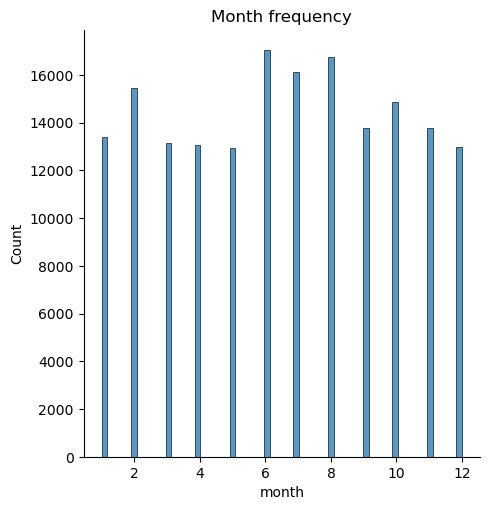

In [51]:
plt.figure(figsize=(10, 6))
month_frequency = sns.displot(df_no_dups['month'], bins = 'auto')
plt.title('Month frequency')

Text(0.5, 1.0, 'Day of Week frequency')

<Figure size 1000x600 with 0 Axes>

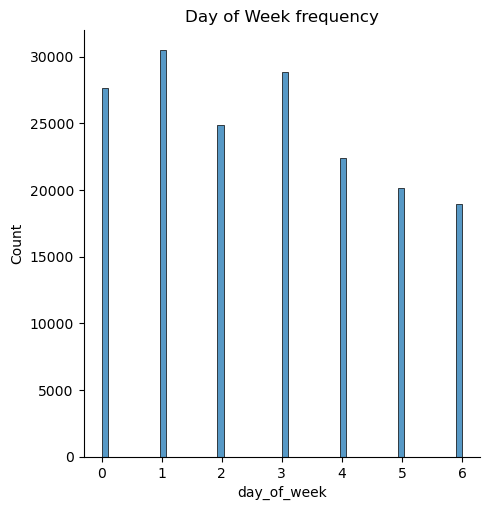

In [52]:
plt.figure(figsize=(10, 6))
day_of_week_frequency = sns.displot(df_no_dups['day_of_week'], bins = 'auto')
plt.title('Day of Week frequency')

Text(0.5, 1.0, 'Hour of Day frequency')

<Figure size 1000x600 with 0 Axes>

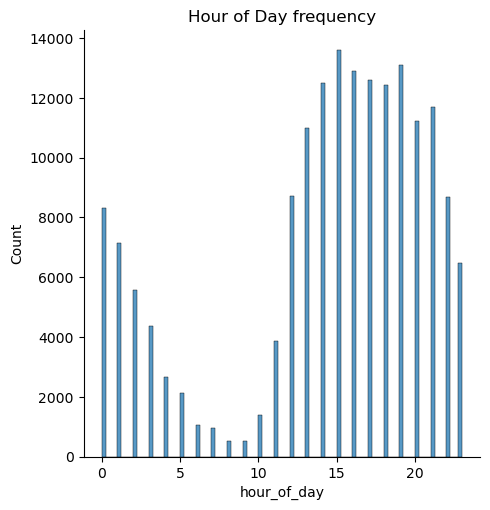

In [53]:
plt.figure(figsize=(10, 6))
hour_of_day_frequency = sns.displot(df_no_dups['hour_of_day'], bins = 'auto')
plt.title('Hour of Day frequency')

## All of these time charts show that my listening varies from hour to hour, day to day, month to month and year to year.  It also reveals that there is no data for 2015 or 2016.  These will serve as good category variables to compare other variables (reason_start and reason_end, etc). 

In [54]:
# creating a crosstab of skipped over time 
skipped_year_crosstab = pd.crosstab(df_no_dups['year'], df_no_dups['skipped'], dropna = False)

In [55]:
skipped_year_crosstab

skipped,not skipped,other,skipped
year,,,
2012,1033,2380,313
2013,716,2369,406
2014,166,580,422
2015,9,70,21
2017,3227,2092,3314
2018,10969,5431,5006
2019,13228,6713,10757
2020,13724,5633,12378
2021,13174,4696,9209


Text(0.5, 1.0, 'skipped status by year')

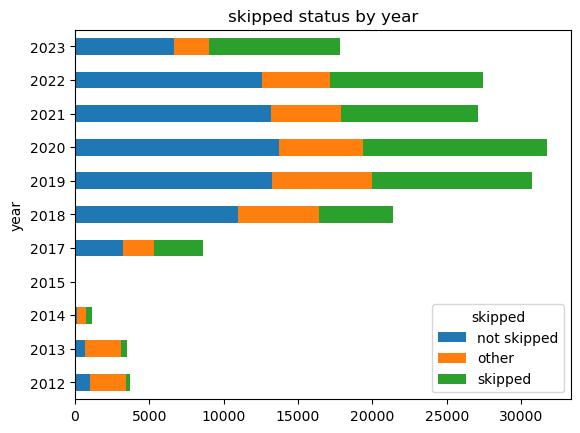

In [56]:
# Creating a visualization of the skipped status by year 
skipped_by_year = skipped_year_crosstab.plot.barh(stacked=True)
plt.title('skipped status by year')


# Exporting Data

In [57]:
df_no_dups.to_pickle(os.path.join(path,'01 Data','02 Prepared Data','df_updated_6.2.pkl'))

# Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### 01. Why are there so many null values for the “skipped” column? Is there any pattern over time that could provide additional context as to the validity of the data?
### 02. How has my listening volume changed over time? Are there any years where I listened to fewer tracks but had longer runtime?
### 03. Do my listening habits change with geographic location significantly? Is there more or less volume or more or less variety depending on where I am?
### 04. Does my listening show any patterns with regards to reason start or reason stop? Has that changed over time?

### 01A.  Unsure why there were so many null values in the skipped column, but by using the reason_end column to create a new skipped column that was significantly more complete.  Looking at it now, there seems to be a change in behavior over time that might be interesting to look into further as I continue to analyze this dataset. 

### 02A.  I don't have a good gauge of this yet, but by creating columns by year, month, day of week and hour of day, I can take a closer look at these specific variables over time to determine any differences. 

### 03A.  I haven't done a spatial analysis of the data yet, so I will have to revisit this question later in the analysis 

### 04A.  Most of my tracks are split between skipped and not skipped, but there is a fairly significant 'other' result that could be worth looking into more specifically later in these exercises.  Based on the current output, there seem to be some differences in habits over time that could be fleshed out with further analysis. 

## New Questions

## 01.  What makes up the 'other' column in the skipped column that I've created 
## 02.  Revisit - How has my listening volume changed over time 
## 03.  What are my most popular artists by total time spent listening?
## 04.  What is the skipped:not-skipped ratio for each song?  Which song has the highest? 
## 05.  How can I categorize songs into different categories based on the number of times I've played them?  

# Hypotheses

## 01H.  Days with lower total listening will show lower percentages of skipped songs 